
##The Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [ ]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [ ]:
import tensorflow
tensorflow.__version__

'2.2.0-rc3'

In [ ]:
#Load and Training Data 

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [ ]:
#https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
#http://lib.stat.cmu.edu/datasets/boston

features = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
            'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
            
B_train = pd.DataFrame(X_train, columns=features)
B_test = pd.DataFrame(X_test, columns=features)

print(B_train.shape, B_test.shape)
print(y_train.shape, y_test.shape)

B_train.head()

(404, 13) (102, 13)
(404,) (102,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [ ]:
B_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


#Normalize the data (all features should have roughly the same scale):

Normalization means to scale a variable to have a values between 0 and 1,

In [ ]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.amax.html
import numpy as np

def normalize_Boston(dataframe):
  df = dataframe.copy()
  df = df/np.amax(df, axis=0)
  return df

data_train_normalize, data_test_normalize = map(normalize_Boston, [B_train, B_test])
data_train_normalize, data_test_normalize.columns

(         CRIM     ZN     INDUS  CHAS  ...       TAX   PTRATIO         B     LSTAT
 0    0.013852  0.000  0.293439   0.0  ...  0.431786  0.954545  1.000000  0.493021
 1    0.000245  0.825  0.073180   0.0  ...  0.489451  0.668182  0.996170  0.081907
 2    0.055051  0.000  0.652487   0.0  ...  0.936709  0.918182  0.946133  0.085857
 3    0.000445  0.000  0.187094   0.0  ...  0.315049  0.918182  1.000000  0.210956
 4    0.041507  0.000  0.652487   0.0  ...  0.936709  0.918182  0.986218  0.385831
 ..        ...    ...       ...   ...  ...       ...       ...       ...       ...
 399  0.002470  0.000  0.249099   0.0  ...  0.327707  0.813636  1.000000  0.426653
 400  0.001822  0.200  0.250901   0.0  ...  0.313643  0.845455  1.000000  0.173558
 401  0.000390  0.350  0.218457   0.0  ...  0.427567  0.768182  0.912698  0.206215
 402  0.024155  0.000  0.705840   0.0  ...  0.566807  0.668182  0.659990  0.415855
 403  0.000162  0.600  0.105624   0.0  ...  0.372714  0.709091  0.949106  0.115354
 
 [

#Import the type of model and layers that you will need from Keras.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Instantiate a model object and use model.add() to add layers to your model

##Since this is a regression model you will have a single output node in the final layer.

##Use activation functions that are appropriate for this task

In [ ]:
#create Model
model = Sequential(name='boston_housing')
model.add(Dense(20, input_shape=(13,), activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1, activation='linear') )

#Compile your model

In [ ]:
#https://keras.io/metrics/
model.compile(loss='mae', 
              optimizer='adam', 
              metrics=['mae',
                       'mse'])

#Fit your model and report its accuracy in terms of Mean Squared Error

In [ ]:
#https://keras.io/models/sequential/
#https://keras.rstudio.com/reference/fit.html
#Fit Model
result = model.fit(data_train_normalize, 
                   y_train, epochs=10)

Epoch 1/10
13/13 [==============================] - 0s 2ms/step - loss: 21.8228 - mae: 21.8584 - mse: 563.4617
Epoch 2/10
13/13 [==============================] - 0s 1ms/step - loss: 21.2229 - mae: 21.1348 - mse: 532.9266
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 19.7878 - mae: 19.8860 - mse: 484.2085
Epoch 4/10
13/13 [==============================] - 0s 1ms/step - loss: 17.3755 - mae: 17.5132 - mse: 397.2833
Epoch 5/10
13/13 [==============================] - 0s 1ms/step - loss: 13.1733 - mae: 13.2204 - mse: 261.8391
Epoch 6/10
13/13 [==============================] - 0s 1ms/step - loss: 8.6920 - mae: 8.7496 - mse: 137.6703
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 8.0759 - mae: 7.9651 - mse: 109.9495
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 7.3692 - mae: 7.3956 - mse: 101.5266
Epoch 9/10
13/13 [==============================] - 0s 1ms/step - loss: 6.9736 - mae: 6.9310 - mse: 93.4238
Epoch 10/1

In [ ]:
#https://www.tensorflow.org/guide/keras/train_and_evaluate
#https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/keras/train_and_evaluate.ipynb
#https://www.programcreek.com/python/example/86709/sklearn.metrics.mean_squared_error

#Model Evaluate
loss, mae, mse = model.evaluate(data_test_normalize, 
                                y_test, verbose=1)

print(f'Mean Squared Error: {mse: .2f} in dollars units')
print(f'Mean Absolute Error: ${mae: .2f}')

4/4 [==============================] - 0s 2ms/step - loss: 7.4380 - mae: 6.6832 - mse: 85.9943
Mean Squared Error:  85.99 in dollars units
Mean Absolute Error: $ 6.68


#Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch.

In [ ]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_history(history, epochs, figsize=(8,5)):
  fig, ax = plt.subplots(figsize=figsize)
  sns.lineplot(data=pd.DataFrame(history), ax=ax)
  plt.title('Neural Network HIstory: Loss and Metrics by Epoch')
  plt.xlim(0, epochs - 1)
  plt.xlabel('Epochs')
  plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


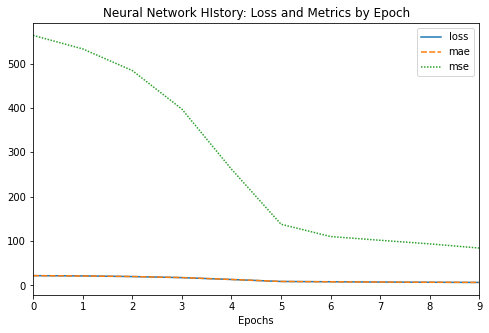

In [ ]:
plot_history(result.history, epochs=10)

#Run this same data through a linear regression model. Which achieves higher accuracy?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
LR = LinearRegression(n_jobs=-2)
y_pred = LR.fit(data_train_normalize, y_train).predict(data_test_normalize)

mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)

print(f'Linear Regression mean squared error: {mse_lr:.2f} in dollars units')
print(f'Linear Regression mean absolute error: ${mae_lr:.2f}')

Linear Regression mean squared error: 27.65 in dollars units
Linear Regression mean absolute error: $3.84


#Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)


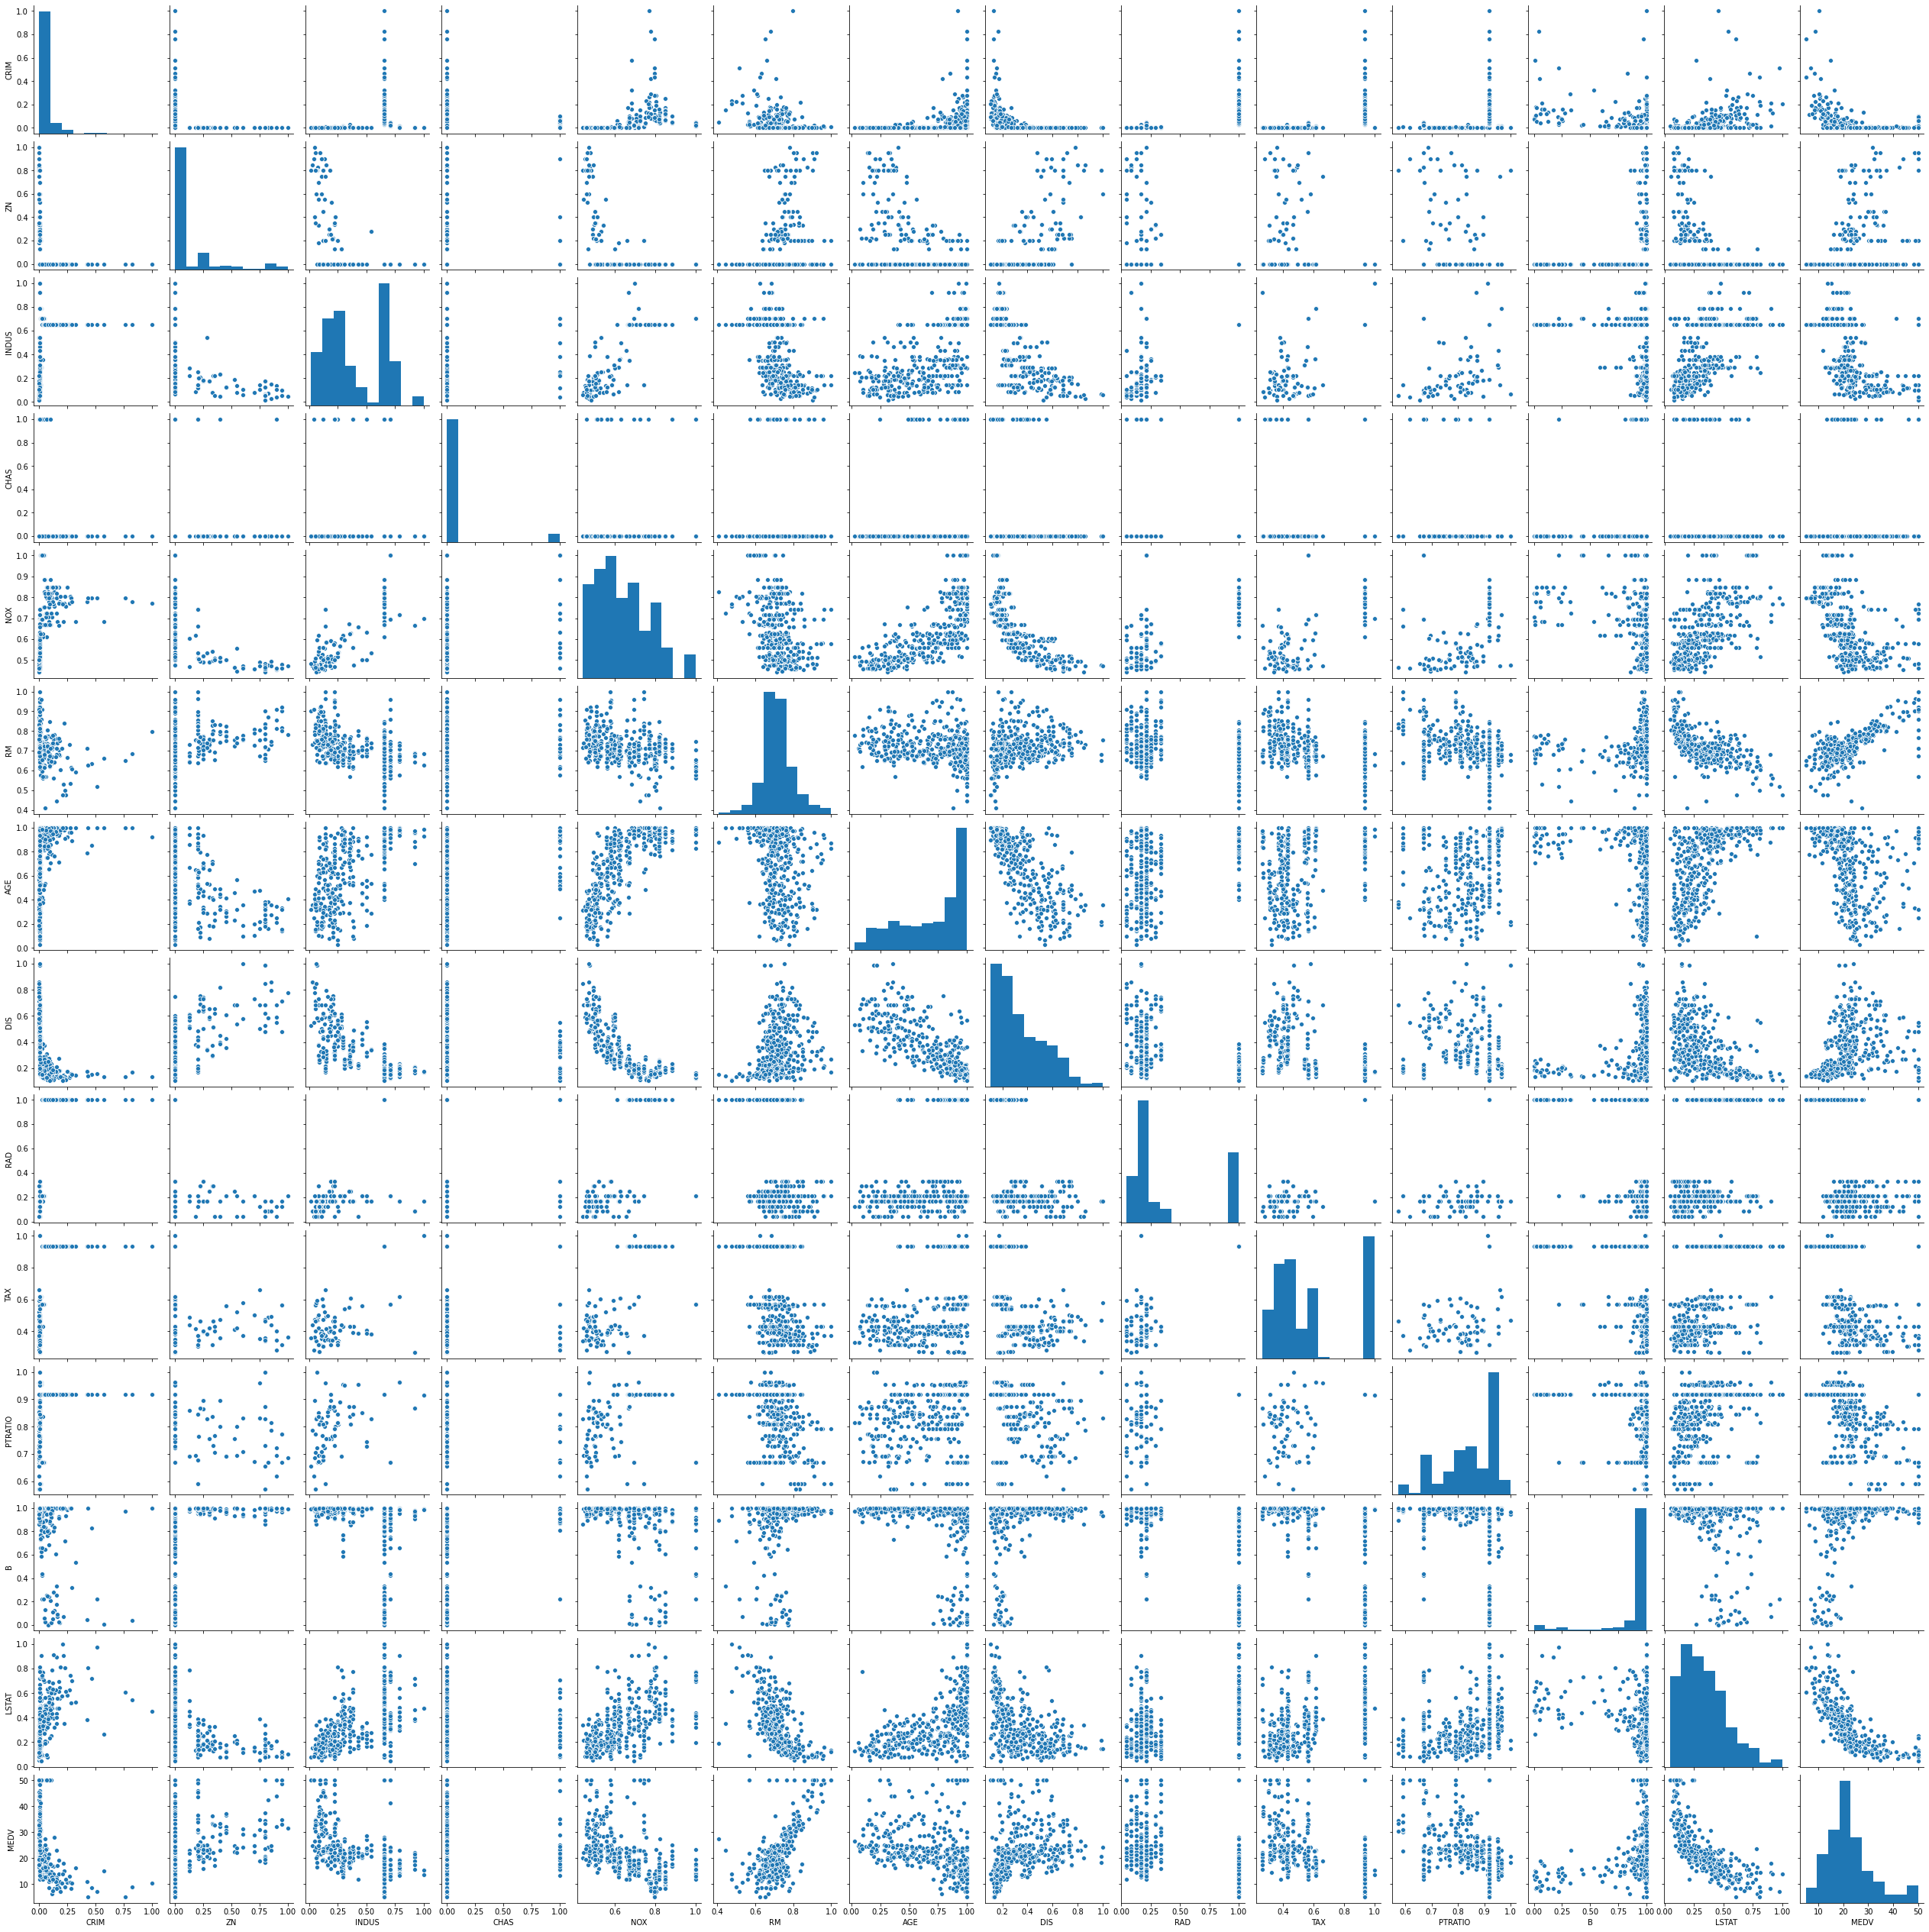

In [ ]:
#https://seaborn.pydata.org/generated/seaborn.pairplot.html

Boston_plot = data_train_normalize.copy()
Boston_plot['MEDV']=y_train
sns.pairplot(Boston_plot);

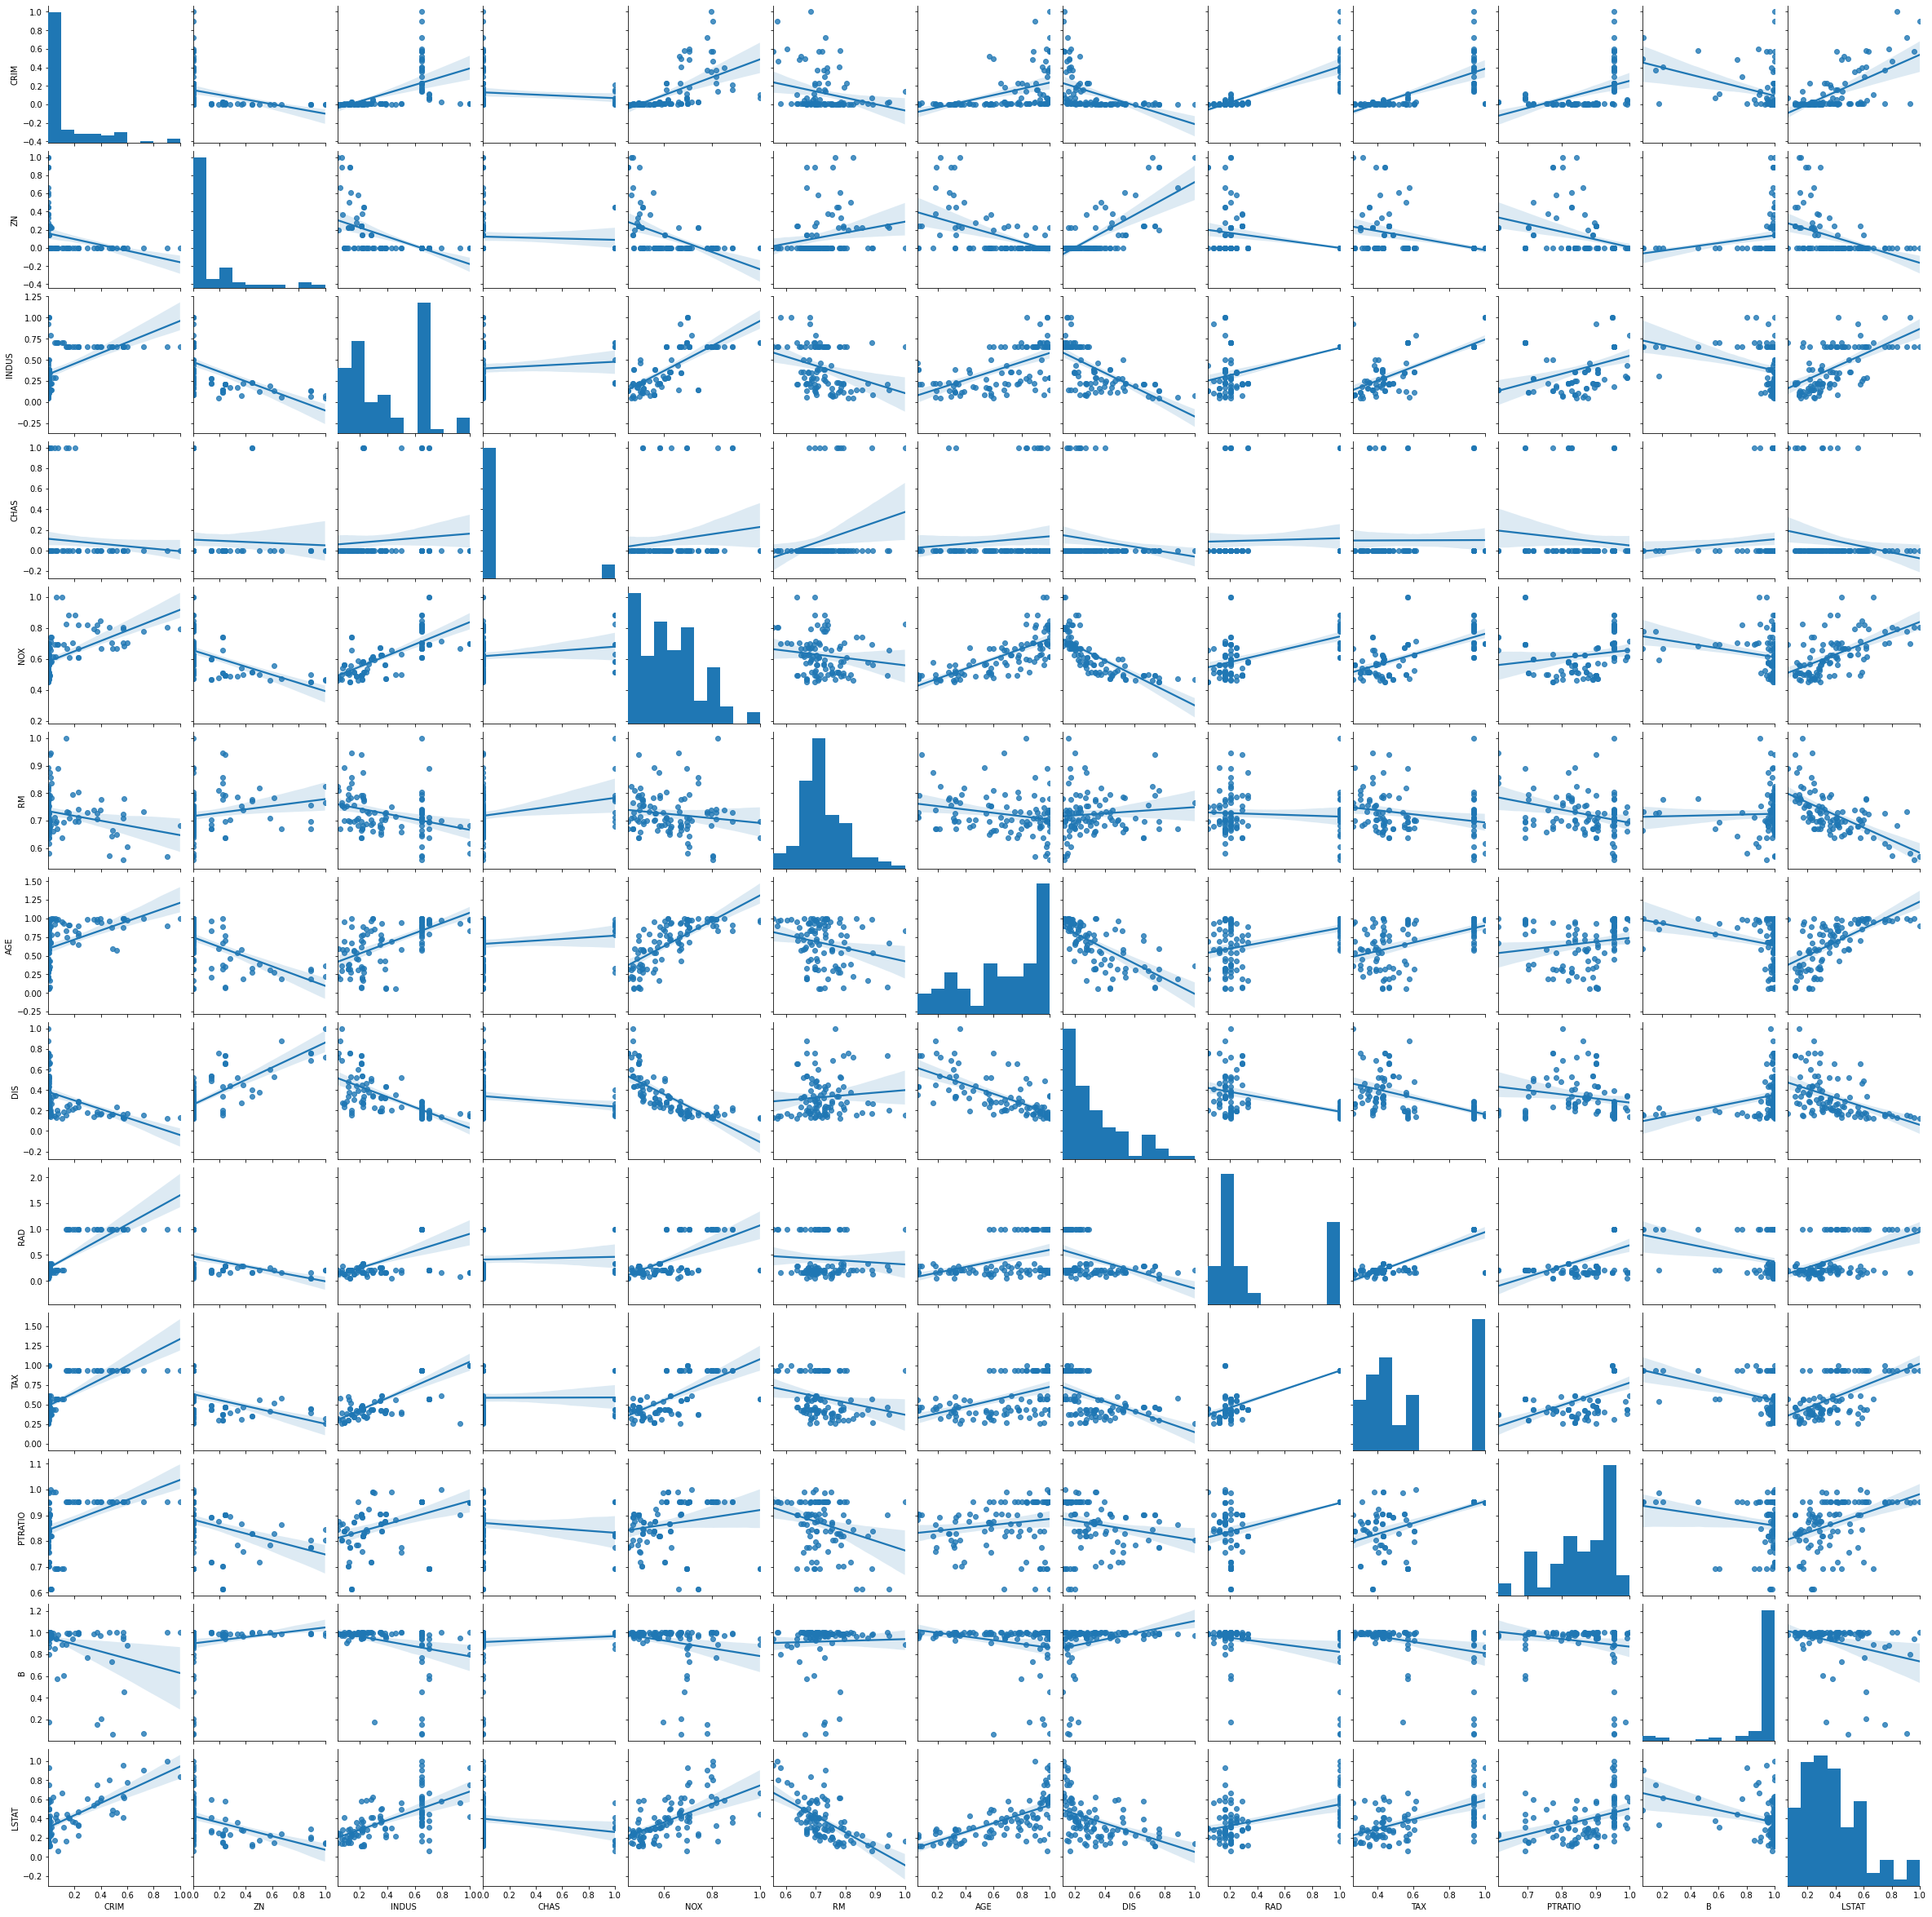

In [ ]:
g = sns.pairplot(data_test_normalize, kind="reg")

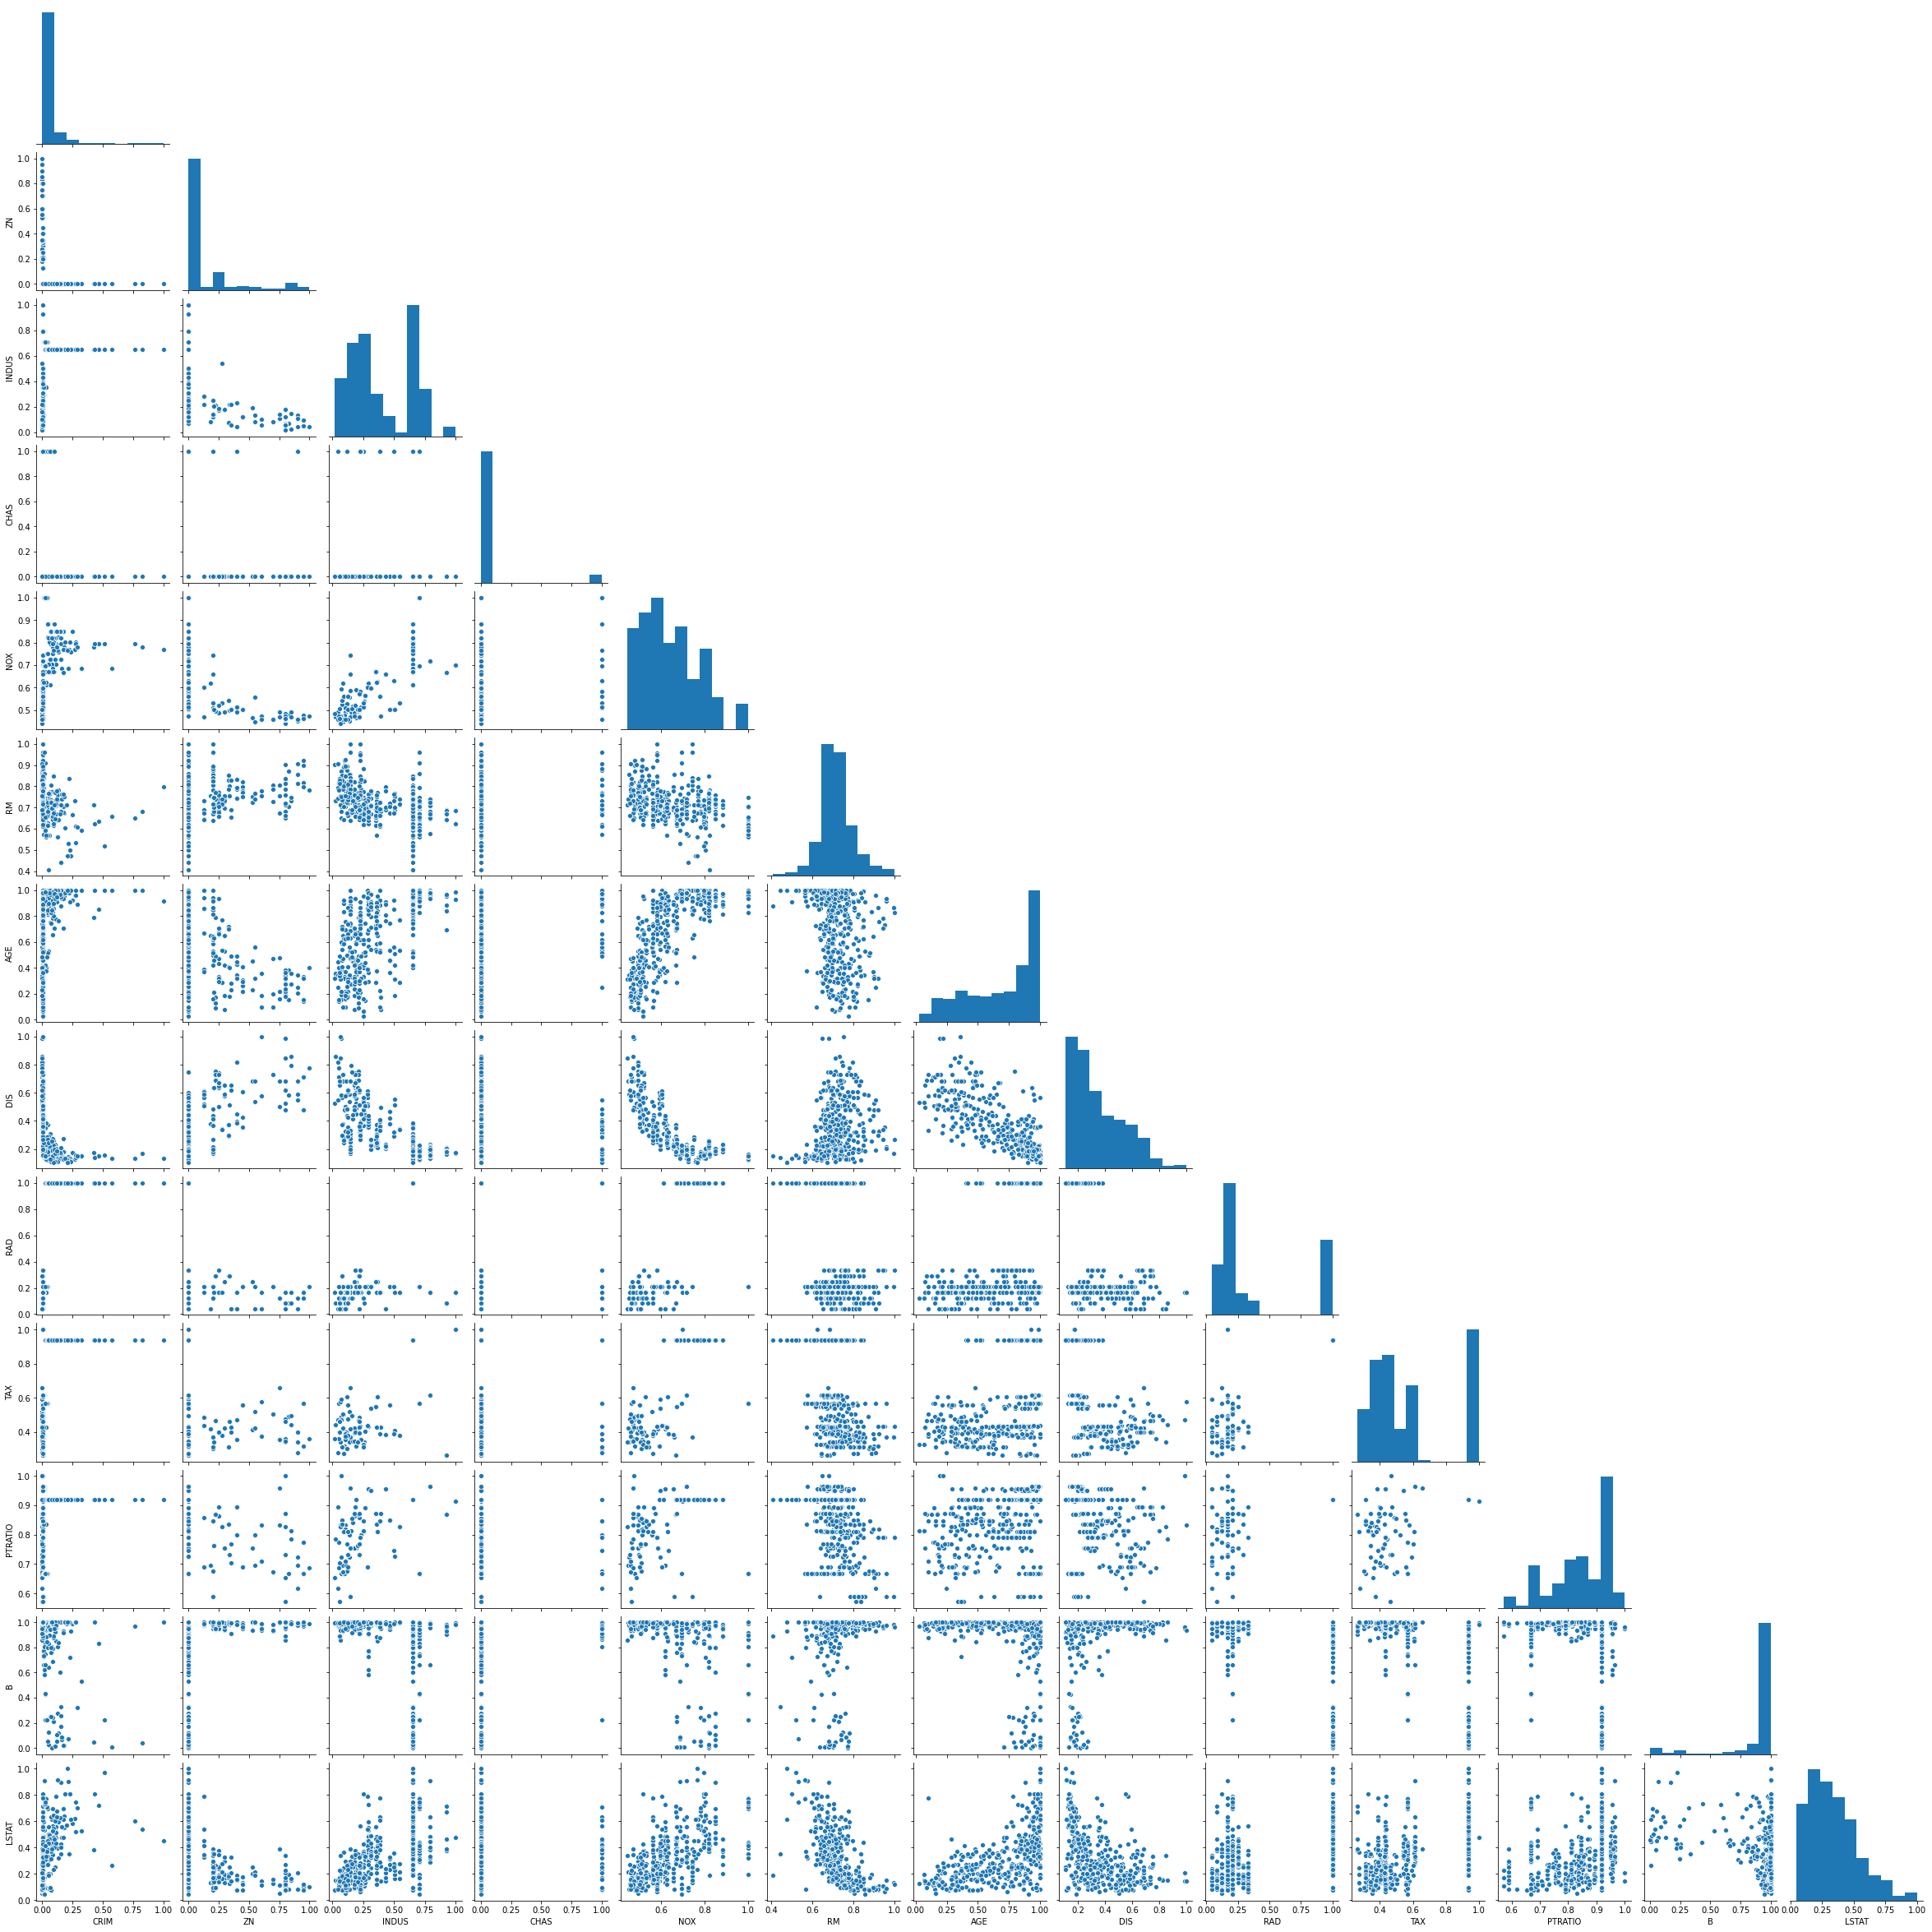

In [ ]:
g = sns.pairplot(data_train_normalize, corner=True)

In [ ]:
def wrangle(dataframe):
  df = dataframe.copy()
  df = df.drop(columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 
                        'NOX', 'RAD', 'TAX', 'PTRATIO'])
  return df

In [ ]:
data_train_normalize_eng, data_test_normalize_eng = map(normalize_Boston, map(wrangle, [B_train, B_test]))
data_train_normalize_eng.shape, data_test_normalize_eng.shape

((404, 5), (102, 5))

In [ ]:
# Model
model2 = Sequential(name='boston_housing_1')
model2.add(Dense(27, input_shape=(5,), activation='relu'))
model2.add(Dense(53, activation='relu'))
model2.add(Dense(26, activation='relu'))
model2.add(Dense(13, activation='relu'))
model2.add(Dense(1, activation='linear'))

# Compille model
model2.compile(loss='mae', 
               optimizer='adam',
               metrics=['mae', 'mse'])

# Fit model
result2 = model2.fit(data_train_normalize_eng, y_train, epochs=10)

LR2 = LinearRegression(n_jobs=-2).fit(data_train_normalize_eng, y_train)

Epoch 1/10
13/13 [==============================] - 0s 2ms/step - loss: 22.4863 - mae: 22.3819 - mse: 585.4881
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 22.2229 - mae: 22.3052 - mse: 582.1821
Epoch 3/10
13/13 [==============================] - 0s 1ms/step - loss: 22.1312 - mae: 22.0602 - mse: 571.0909
Epoch 4/10
13/13 [==============================] - 0s 1ms/step - loss: 21.4838 - mae: 21.5310 - mse: 548.2048
Epoch 5/10
13/13 [==============================] - 0s 1ms/step - loss: 20.3521 - mae: 20.4398 - mse: 502.5355
Epoch 6/10
13/13 [==============================] - 0s 1ms/step - loss: 17.9957 - mae: 18.1383 - mse: 415.0757
Epoch 7/10
13/13 [==============================] - 0s 1ms/step - loss: 13.6779 - mae: 13.7182 - mse: 273.7171
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 7.9498 - mae: 8.0734 - mse: 127.9321
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 7.2177 - mae: 7.2251 - mse: 91.8285
Epoch 

#After feature engineering, which model sees a greater accuracy boost due to the new features?

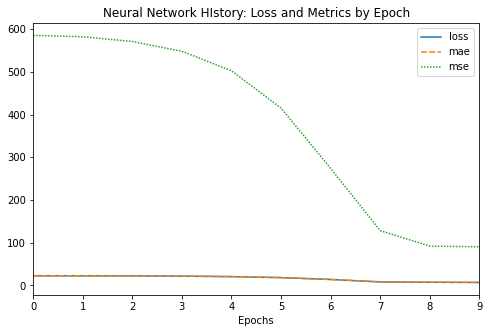

4/4 [==============================] - 0s 2ms/step - loss: 8.1827 - mae: 7.3476 - mse: 101.1810
Test Mean Squared Error:  101.18 in dollars units
Test Absolute Error:  101.18


In [ ]:
#Evalue Model

plot_history(result2.history, epochs=10)

loss2, mae2, mse2 = model2.evaluate(data_test_normalize_eng, y_test, verbose=1)
print(f'Test Mean Squared Error: {mse2: .2f} in dollars units')
print(f'Test Absolute Error: {mse2: .2f}')

In [ ]:
y_pred2 = LR2.predict(data_test_normalize_eng)
mse_lr2 = mean_absolute_error(y_test, y_pred2)
mae_lr2 = mean_squared_error(y_test, y_pred2)

print(f'Linear Regression Mean Squared Error: {mse_lr2: .2f} in dollars per unit')
print(f'Linear Regression Mean Absolute Error: ${mse_lr2: .2f}') 

Linear Regression Mean Squared Error:  3.58 in dollars per unit
Linear Regression Mean Absolute Error: $ 3.58


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

#Load and preprocess the image data similar to how we preprocessed the MNIST data in class.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [ ]:
def norm_fashion(Data):
  return Data/355

In [ ]:
#Training Data:
x_train_normalize, x_test_normalize = map(norm_fashion, [x_train, x_test])

#Make sure to one-hot encode your category labels

In [ ]:
#Encode category labels
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.layers import Flatten

def encode_class(classes):
  return to_categorical(classes, num_classes=len(np.unique(classes)))

y_train_encoded, y_test_encoded = map(encode_class, [y_train, y_test])

#The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.

In [ ]:
#Model
model = Sequential(name='Fashion-MNIST')
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#Compile Model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

#fit Model
results = model.fit(x_train_normalize, y_train_encoded, epochs=10)

#Evaluate Model
loss, accuracy = model.evaluate(x_test_normalize, y_test_encoded)

print(f'Neural Network Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6321 - accuracy: 0.7904
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4723 - accuracy: 0.8401
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4415 - accuracy: 0.8493
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4274 - accuracy: 0.8522
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4174 - accuracy: 0.8561
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4094 - accuracy: 0.8589
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4057 - accuracy: 0.8595
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4003 - accuracy: 0.8618
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3968 - accuracy: 0.8632
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.4412 

#Try different hyperparameters. What is the highest accuracy that you are able to achieve.

In [ ]:
def fit_evaluate_model(model):
    # Fit model
    results = model.fit(x_train_normalize, y_train_encoded, epochs=10)

    print('\n Evaluating test set.\n')
    
    # Evaluate model
    loss, accuracy = model.evaluate(x_test_normalize, y_test_encoded)

    print(f'Neural network test accuracy: {accuracy * 100:.2f}%')
    
    return results

In [ ]:
# Define model
model = Sequential(name='Fashion-MNIST')
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

results_etra_layer = fit_evaluate_model(model)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5158 - accuracy: 0.8194
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3874 - accuracy: 0.8601
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3466 - accuracy: 0.8735
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3212 - accuracy: 0.8820
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3047 - accuracy: 0.8885
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2878 - accuracy: 0.8934
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2762 - accuracy: 0.8983
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9010
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2558 - accuracy: 0.9049
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.246

In [ ]:
# Define model
model = Sequential(name='Fashion-MNIST')
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

results_layers_nadam = fit_evaluate_model(model)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6017 - accuracy: 0.7814
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4267 - accuracy: 0.8461
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3919 - accuracy: 0.8572
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3685 - accuracy: 0.8654
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3540 - accuracy: 0.8709
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3437 - accuracy: 0.8735
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3344 - accuracy: 0.8773
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3268 - accuracy: 0.8787
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3212 - accuracy: 0.8810
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.313

In [ ]:
# Define model
model = Sequential(name='Fashion-MNIST')
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

results_3Blayers_nadam = fit_evaluate_model(model)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4989 - accuracy: 0.8214
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3668 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3340 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3101 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2940 - accuracy: 0.8898
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2823 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2679 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2563 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2483 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

#Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch.

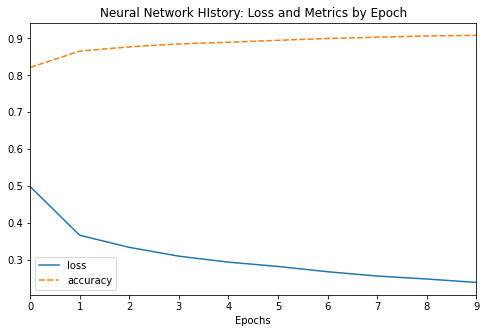

In [ ]:
plot_history(results_3Blayers_nadam.history, epochs=10)


- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.